###IMPORT DATA CLEAN

In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

import pandas as pd

# Membaca dataset yang sudah dipreprocessing
df = pd.read_csv('Korupsi Clean.csv', encoding='utf-8')

Saving Korupsi Clean.csv to Korupsi Clean.csv


###TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Mengambil teks dari kolom 'text'
corpus = df['text'].tolist()

# Representasi TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, max_df=0.95, min_df=2)
X = vectorizer.fit_transform(corpus)

# Melihat fitur yang diekstrak
features = vectorizer.get_feature_names_out()

# Mengubah hasil TF-IDF menjadi DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=features)

print(tfidf_df)

        acara  achsanul  adik  afrika  agama  agamis  agung  agus  agustiawan  \
0    0.000000       0.0   0.0     0.0    0.0     0.0    0.0   0.0         0.0   
1    0.000000       0.0   0.0     0.0    0.0     0.0    0.0   0.0         0.0   
2    0.000000       0.0   0.0     0.0    0.0     0.0    0.0   0.0         0.0   
3    0.000000       0.0   0.0     0.0    0.0     0.0    0.0   0.0         0.0   
4    0.000000       0.0   0.0     0.0    0.0     0.0    0.0   0.0         0.0   
..        ...       ...   ...     ...    ...     ...    ...   ...         ...   
631  0.000000       0.0   0.0     0.0    0.0     0.0    0.0   0.0         0.0   
632  0.000000       0.0   0.0     0.0    0.0     0.0    0.0   0.0         0.0   
633  0.339911       0.0   0.0     0.0    0.0     0.0    0.0   0.0         0.0   
634  0.000000       0.0   0.0     0.0    0.0     0.0    0.0   0.0         0.0   
635  0.000000       0.0   0.0     0.0    0.0     0.0    0.0   0.0         0.0   

     aipda  ...  wartawan  

###K-MEANS CLUSTERING

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

# Penerapan K-means clustering dengan centroid awal acak
k = 5  # Jumlah kelompok yang diinginkan
kmeans = KMeans(n_clusters=k, init='random', random_state=30)
kmeans.fit(X)

# Menambahkan kolom hasil clustering ke dalam DataFrame
df['cluster'] = kmeans.labels_

# Menghitung centroid yang baru secara manual
new_centroids = np.zeros((k, X.shape[1]))

for cluster_id in range(k):
    cluster_points = X[df['cluster'] == cluster_id]
    if cluster_points.shape[0] > 0:
        new_centroids[cluster_id] = cluster_points.mean(axis=0)

# Menampilkan centroid yang baru
print("Centroid yang baru:")
print(new_centroids)

# Menghitung jarak Euclidean setiap data poin terhadap centroid yang sesuai
distances = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    cluster_id = kmeans.labels_[i]
    distances[i] = np.linalg.norm(X[i] - new_centroids[cluster_id])

# Menambahkan kolom jarak ke dalam DataFrame
df['distance_to_centroid'] = distances

# Menampilkan jarak setiap data poin terhadap centroid
print("Jarak setiap data poin terhadap centroid yang sesuai:")
print(df[['text', 'cluster', 'distance_to_centroid']].head())

# Evaluasi dengan Silhouette Score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score untuk {k} kelompok: {silhouette_avg}")

# Menampilkan hasil clustering
for cluster_id in range(k):
    cluster_tweets = df[df['cluster'] == cluster_id]['text'].tolist()
    print(f"Kelompok {cluster_id + 1}:")
    for tweet in cluster_tweets[:3]:  # Tampilkan 3 tweet pertama dari setiap kelompok
        print(f"- {tweet}")
    print()

Centroid yang baru:
[[0.         0.         0.         ... 0.         0.01296876 0.        ]
 [0.00167089 0.00435051 0.00294501 ... 0.00139644 0.00239827 0.00043096]
 [0.         0.00245686 0.         ... 0.         0.00509266 0.        ]
 [0.00477511 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.20620993]]
Jarak setiap data poin terhadap centroid yang sesuai:
                                                text  cluster  \
0  perusahaan meminjam pinjol karyawan wtf indofa...        1   
1  bismillah ibhrs darurat akhlak indonesia penip...        1   
2  dosa pdip part ii korupsi bansos beras pandemi...        1   
3   mbakmbak istri terpidana korupsi alquran koru...        1   
4  bismillah video judul terang an korupsi terang...        1   

   distance_to_centroid  
0              0.997380  
1              0.993926  
2              0.995106  
3              1.001546  
4              0.995443  
Silhouette Sc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


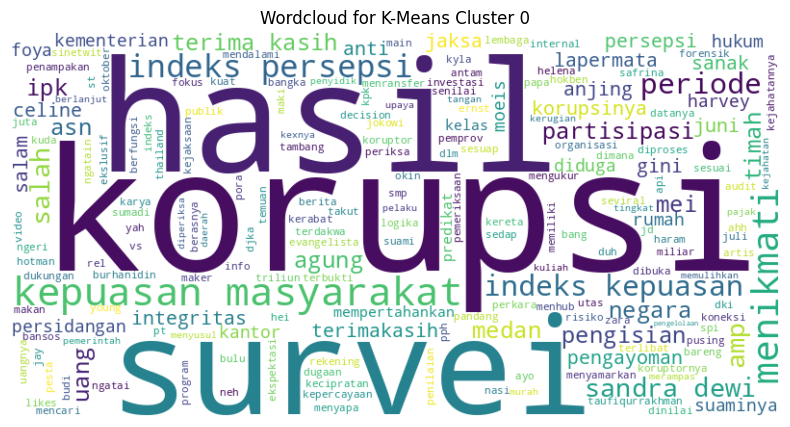

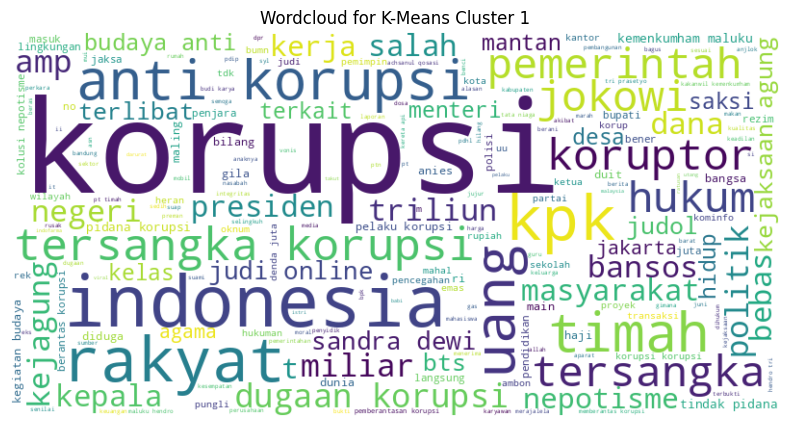

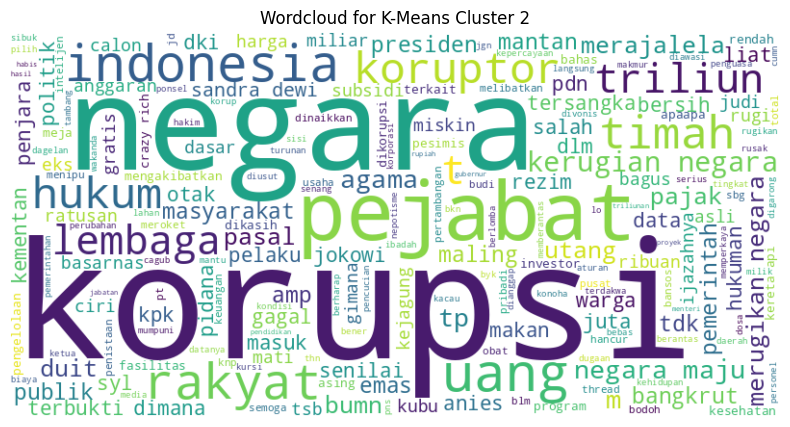

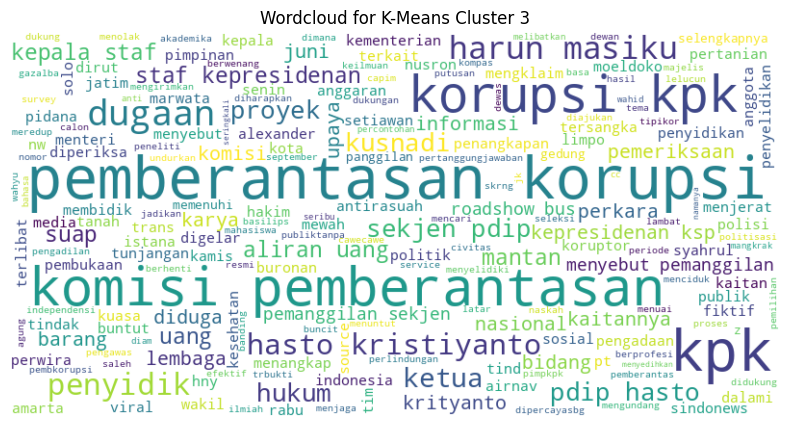

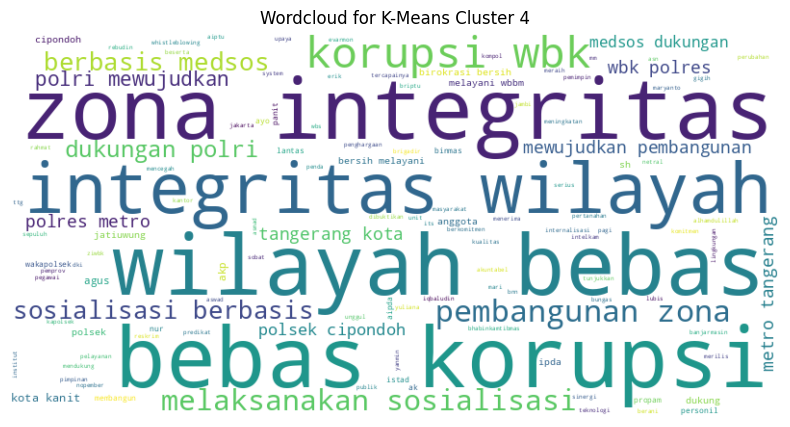

In [ ]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Membuat wordcloud untuk setiap kluster
for cluster_id in range(k):
    cluster_text = ' '.join(df[df['cluster'] == cluster_id]['text'])
    wordcloud = WordCloud(stopwords='english', width=800, height=400, background_color='white').generate(cluster_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Wordcloud for K-Means Cluster {cluster_id}')
    plt.show()

###DBSCAN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

In [ ]:
# Menerapkan DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=4)
clusters = dbscan.fit_predict(X)

# Menambahkan kolom hasil clustering ke dalam DataFrame
df['Cluster'] = clusters

# Menghitung centroid dari setiap cluster
unique_clusters = np.unique(clusters)
unique_clusters = unique_clusters[unique_clusters != -1]  # Menghapus noise cluster
centroids = np.zeros((len(unique_clusters), X.shape[1]))

for i, cluster_id in enumerate(unique_clusters):
    cluster_points = X[clusters == cluster_id].toarray()
    if cluster_points.shape[0] > 0:
        centroids[i] = cluster_points.mean(axis=0)

# Menghitung jarak Euclidean setiap data poin terhadap centroid yang sesuai
distances = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    cluster_id = clusters[i]
    if cluster_id != -1:
        centroid = centroids[unique_clusters == cluster_id]
        distances[i] = np.linalg.norm(X[i].toarray() - centroid)

# Menambahkan kolom jarak ke dalam DataFrame
df['distance_to_centroid'] = distances

# Menampilkan jarak setiap data poin terhadap centroid
print("Jarak setiap data poin terhadap centroid yang sesuai:")
print(df[['text', 'Cluster', 'distance_to_centroid']].head())

# Menghitung Silhouette Score
# Mengabaikan data poin yang diberi label noise (-1)
silhouette_avg = silhouette_score(X[clusters != -1], clusters[clusters != -1])
print(f"Silhouette Score: {silhouette_avg}")

# Menampilkan hasil clustering
print("Hasil Clustering:")
for cluster_id in unique_clusters:
    cluster_tweets = df[df['Cluster'] == cluster_id]['text'].tolist()
    print(f"Kelompok {cluster_id + 1}:")
    for tweet in cluster_tweets[:3]:  # Tampilkan 3 tweet pertama dari setiap kelompok
        print(f"- {tweet}")
    print()

Jarak setiap data poin terhadap centroid yang sesuai:
                                                text  Cluster  \
0  perusahaan meminjam pinjol karyawan wtf indofa...       -1   
1  bismillah ibhrs darurat akhlak indonesia penip...       -1   
2  dosa pdip part ii korupsi bansos beras pandemi...       -1   
3   mbakmbak istri terpidana korupsi alquran koru...       -1   
4  bismillah video judul terang an korupsi terang...       -1   

   distance_to_centroid  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
Silhouette Score: 0.4476183870537511
Hasil Clustering:
Kelompok 1:
-  hasil survei indeks persepsi korupsi ipk indeks kepuasan masyarakat periode juni terimakasih partisipasi pengisian survei salam pengayoman 
-  hasil survei indeks persepsi korupsi ipk indeks kepuasan masyarakat periode mei terimakasih partisipasi pengisian survei salam pengayoman 
-  hasil survei indeks persepsi korupsi indeks 

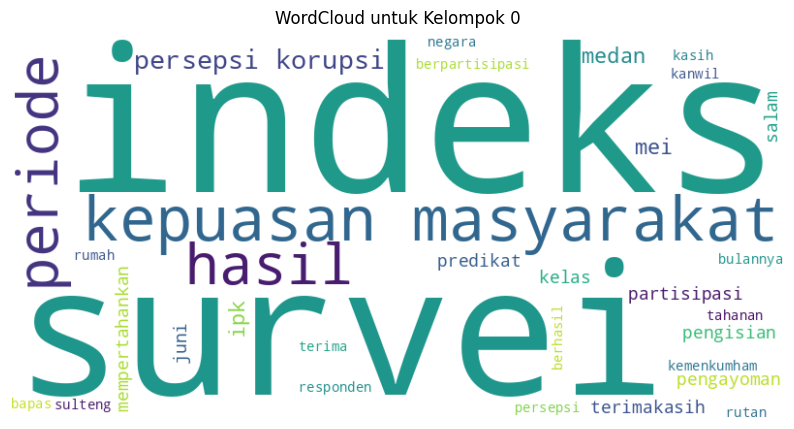

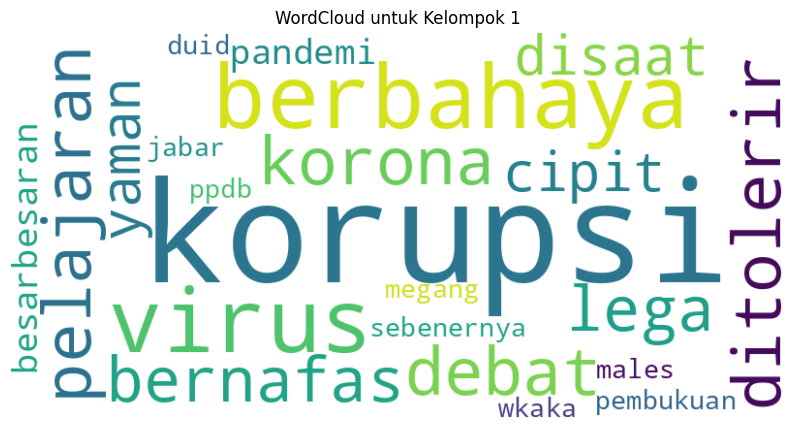

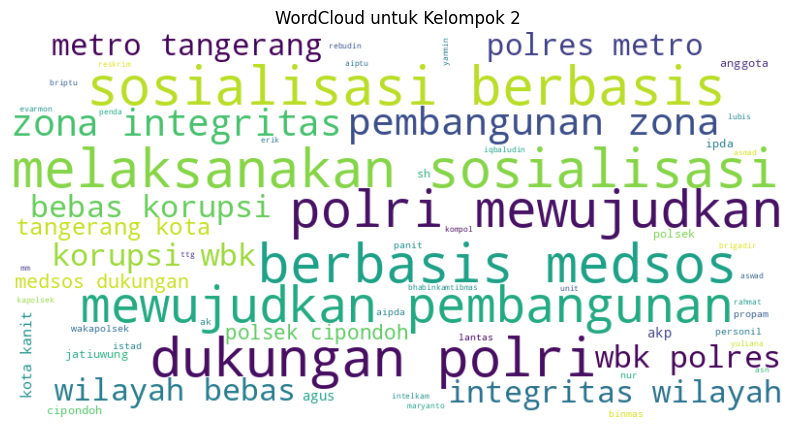

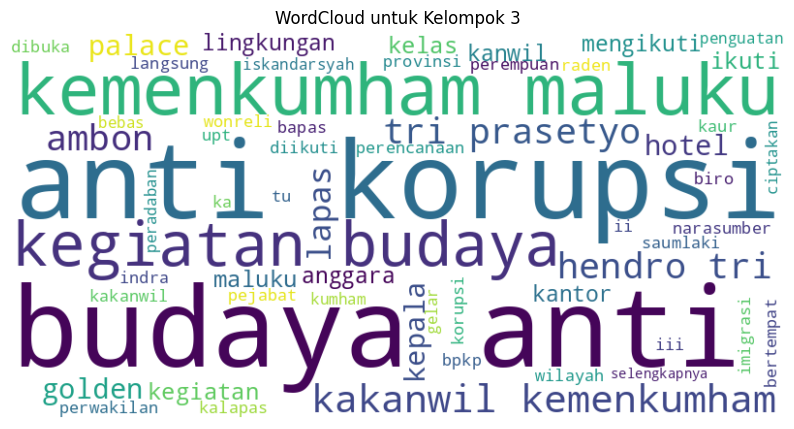

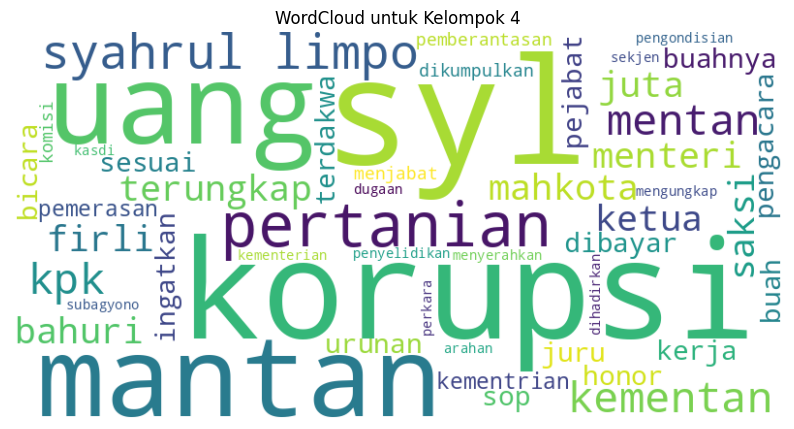

In [ ]:
# Menerapkan DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=4)
clusters = dbscan.fit_predict(X)

# Menambahkan kolom hasil clustering ke dalam DataFrame
df['Cluster'] = clusters

# Mengambil teks dari setiap cluster
cluster_texts = {}
for cluster_id in np.unique(clusters):
    if cluster_id != -1:  # Jangan termasuk noise
        cluster_texts[cluster_id] = ' '.join(df[df['Cluster'] == cluster_id]['text'].tolist())

# Membuat WordCloud untuk setiap cluster
for cluster_id, text in cluster_texts.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=150, colormap='viridis').generate(text)

    # Plot WordCloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud untuk Kelompok {cluster_id}')
    plt.axis('off')
    plt.show()

###TABEL PERBANDINGAN

In [ ]:
# K-means clustering
k = 5  # Jumlah kelompok yang diinginkan
kmeans = KMeans(n_clusters=k, init='random', random_state=30)
kmeans_labels = kmeans.fit_predict(X)
kmeans_silhouette = silhouette_score(X, kmeans_labels)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.9, min_samples=4)
dbscan_labels = dbscan.fit_predict(X)
# Hitung Silhouette Score untuk DBSCAN, hanya perhitungkan data poin yang bukan noise
dbscan_silhouette = silhouette_score(X[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])

# Buat DataFrame untuk menampilkan tabel perbandingan
comparison_table = pd.DataFrame({
    'Metode Clustering': ['K-means', 'DBSCAN'],
    'Silhouette Score': [kmeans_silhouette, dbscan_silhouette]
})

print("Tabel Perbandingan Metode Clustering (berdasarkan Silhouette Score):")
print(comparison_table)


Tabel Perbandingan Metode Clustering (berdasarkan Silhouette Score):
  Metode Clustering  Silhouette Score
0           K-means          0.017280
1            DBSCAN          0.447618


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
